In [195]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

In [196]:
###  RAW data
data = datasets.load_wine()
#print(data.target_names)
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = data.target

var_columns = [c for c in df_wine.columns]
X = df_wine.loc[:,var_columns]
y = df_wine.loc[:,'target']

In [187]:
### STANDARDIZED data
data_s=datasets.load_wine()

X_data = data_s.data
# standardization of dependent variables
standard = preprocessing.scale(X_data)

df_wine = pd.DataFrame(standard, columns=data_s.feature_names)
df_wine['target'] = data_s.target

var_columns = [c for c in df_wine.columns]
X = df_wine.loc[:,var_columns]
y = df_wine.loc[:,'target']

In [197]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [198]:
state = 12  
test_size = 0.30  
  
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=state)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((124, 14), (54, 14), (124,), (54,))

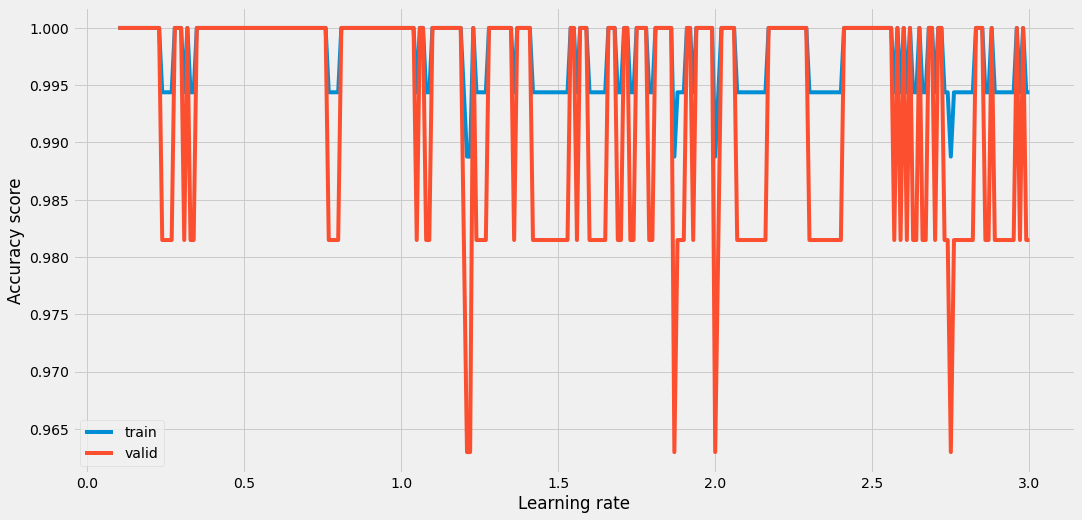

In [199]:
#lr_list = [0.01, 0.015, 0.1, 5]
lr_list=[i/100 for i in range(10,301)]
train=[]
valid=[]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    train.append(gb_clf.score(X, y))
    valid.append(gb_clf.score(X_valid, y_valid))
    
#     print('Trees were created:',len(gb_clf.estimators_))
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X, y)))
#     print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_valid, y_valid)))
#     print()
figsize(16, 8)
plt.figure()
plt.plot(lr_list,train,label='train')
plt.plot(lr_list,valid,label='valid')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

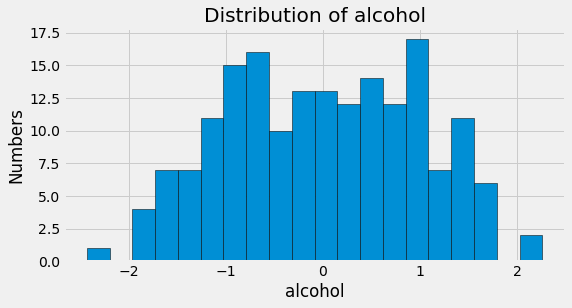

In [194]:
figsize(8, 4)
name_col='alcohol'
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df_wine[name_col].dropna(), bins = 20, edgecolor = 'k');
#plt.hist(df_wine[name_col], edgecolor = 'k');
plt.xlabel(name_col); plt.ylabel('Numbers'); 
plt.title('Distribution of ' + name_col);